# Proyecto C&P
Desarrollar una automatización que permita extraer e interpretar la data del archivo Student-mat.csv y Student-por.csv de manera que una la información solicitada de ambos archivos y realice los requerimientos solicitados

Dataset tomado de:
https://archive.ics.uci.edu/dataset/320/student+performance

# Importar los datos a python

In [1]:
# normalmente los archivos .csv viene separados por, en este caso especial estan con ;


import pandas as pd
from IPython.core.display import HTML


file1="student-mat.csv"
file2="student-por.csv"

def open_csv(file):
    data=pd.read_csv(file,sep=";") # siempre lo lee como dataframe
    return data

data_mat=open_csv(file1)
data_por=open_csv(file2)

#display(HTML(data_mat.to_html())) # print
print("__________________Data MAT___________________")
data_mat.info()
print("__________________Data POR___________________")
data_por.info()

__________________Data MAT___________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nurs

In [2]:
display(HTML(data_mat.to_html())) # print

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


# 1)

Para ambos archivos: Cree un DataFrame para cada escuela, con el formato de nombre “nombrecolegio_curso” que reúna los datos de las columnas: school, sex, age, address, Pstatus, guardian, traveltime, studytime, failures, paid, internet, health, absences, G1,G2,G3

In [3]:
# crear un dataframe en el que se filtre por las columnas solicitadas

#filtro por columnas el dataframe completo 

df_mat=data_mat[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime", "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]
df_por=data_por[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime", "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]

#Ahora filtro por filas para separar los colegios
#groupby -> agrupar por filtro de busqueda para crear un nuevo df

#groupby busca cosas repetidas en la columna y las agrupa, crea un diccionario donde
#la key es ese valor que encontro repetido y el value es un dataframe con las filas que contienen ese valor
df_mat_sep=df_mat.groupby(["school"])
df_por_sep=df_por.groupby(["school"])


# aplico el filtro para mat y separo los dataframe por escuela
for key,group in df_mat_sep:
    
    if key=="GP":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        gp_mat=group
        
    elif key=="MS":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        ms_mat=group

        
for key,group in df_por_sep:
    
    if key=="GP":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        gp_por=group
        
    elif key=="MS":
        #print(f"la key es : {key} y el grupo es : \n {group}")
        ms_por=group        
        
'''
Recapitulando:
Tengo:

# dataframes originales _ Raw data
data_mat
data_por

# df con las columnas filtradas
df_mat
df_por


# cada materia separada para cada colegio 
gp_mat
ms_mat
gp_por
ms_por
'''
#display(HTML(ms_por.to_html())) # print


'\nRecapitulando:\nTengo:\n\n# dataframes originales _ Raw data\ndata_mat\ndata_por\n\n# df con las columnas filtradas\ndf_mat\ndf_por\n\n\n# cada materia separada para cada colegio \ngp_mat\nms_mat\ngp_por\nms_por\n'

# 2
Verifique que no haya data de valor nulo (NaN), en caso de encontrar algún valor NaN se deberá eliminar toda la fila


In [4]:
# normalmente eso es lo primero que se hace despues de tener la raw data
# filtro y limpio los valores nulos

# dropna elimina toda la fila si encuentra un valor nulo, se puede especificar para que lo haga
# en una columna especifica, en este caso se hace generico

# axis =0 filas
# axis =1 columnas
gp_mat=gp_mat.dropna(how="any",axis=0)
ms_mat=ms_mat.dropna(how="any",axis=0)
gp_por=gp_por.dropna(how="any",axis=0)
ms_por=ms_por.dropna(how="any",axis=0)

# 3
Para cada escuela muestre un grafico circular(pastel) donde se evidencie el porcentaje de estudiantes hombres y mujeres de cada curso

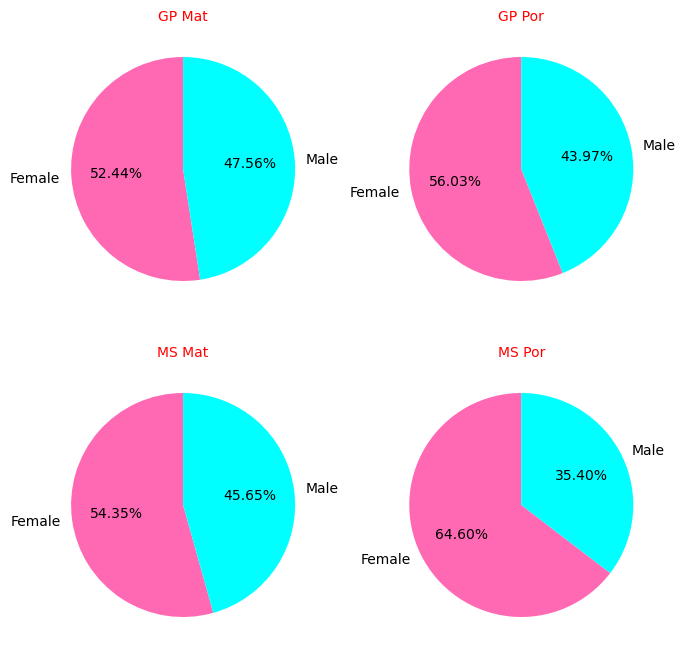

In [5]:
#print(gp_mat["sex"].value_counts()) # separa y cuenta las cosas repetidaas

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
#subplot(filas columnas cuadrante)
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)


ax1.set_title("GP Mat",fontsize=10,color="red")
ax2.set_title("GP Por",fontsize=10,color="red")
ax3.set_title("MS Mat",fontsize=10,color="red")
ax4.set_title("MS Por",fontsize=10,color="red")

ax1.pie(gp_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":10})
ax2.pie(gp_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":10})
ax3.pie(ms_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":10})
ax4.pie(ms_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":10})

plt.show()

# 4
Para cada escuela muestre un gráfico de barras donde se muestre la cantidad de estudiantes que tienen la misma edad

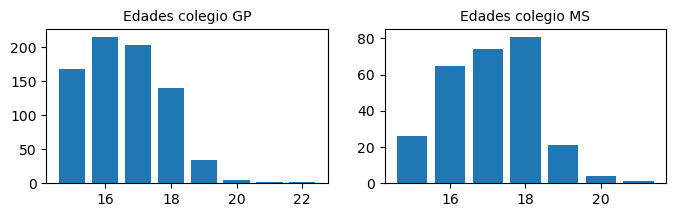

In [6]:
# necesitamos juntar por colegios con ambas materias

#gp_mat
#gp_por
#necesitamos juntarlos en un solo df

gp=pd.concat([gp_mat,gp_por])
ms=pd.concat([ms_mat,ms_por])
#display(HTML(gp.to_html())) # print
'''
Recapitulando:
Tengo:

# dataframes originales _ Raw data
data_mat
data_por

# df con las columnas filtradas
df_mat
df_por


# cada materia separada para cada colegio 
gp_mat
ms_mat
gp_por
ms_por

# ambos grupos para cada colegio
gp
ms

'''
plt.figure(figsize=(8,2))
ax1=plt.subplot(121)
ax2=plt.subplot(122)

ax1.set_title("Edades colegio GP",fontsize=10)
ax2.set_title("Edades colegio MS",fontsize=10)

# x=gp["age"].value_counts().index
# Y=gp["age"].value_counts().values

ax1.bar(gp["age"].value_counts().index,gp["age"].value_counts().values)
ax2.bar(ms["age"].value_counts().index,ms["age"].value_counts().values)
plt.show()

# 5
Muestre el promedio de las edades de cada curso de cada escuela

In [7]:
print("la edad promedio de GP Mat es: ",gp_mat["age"].mean())
print("la edad promedio de GP Por es: ",gp_por["age"].mean())
print("la edad promedio de MS Mat es: ",ms_mat["age"].mean())
print("la edad promedio de MS Por es: ",ms_por["age"].mean())

la edad promedio de GP Mat es:  16.521489971346703
la edad promedio de GP Por es:  16.666666666666668
la edad promedio de MS Mat es:  18.02173913043478
la edad promedio de MS Por es:  16.88938053097345


# 6
Muestre el promedio de las notas G1,G2,G3 de cada curso de cada escuela

In [8]:
grades_gp_mat=gp_mat[["G1","G2","G3"]]
avg_gp_mat=grades_gp_mat.mean()
print("Colegio GP curso de Matematicas ")
print(avg_gp_mat)
print("__________________________________________________")

#print("nota maxima =", gp_mat[["G1","G2","G3"]].max())
grades_gp_por=gp_por[["G1","G2","G3"]]
avg_gp_por=grades_gp_por.mean()
print("Colegio GP curso de Portugues ")
print(avg_gp_por)
print("__________________________________________________")

grades_ms_mat=ms_mat[["G1","G2","G3"]]
avg_ms_mat=grades_ms_mat.mean()
print("Colegio MS curso de Matematicas ")
print(avg_ms_mat)
print("__________________________________________________")

grades_ms_por=ms_por[["G1","G2","G3"]]
avg_ms_por=grades_ms_por.mean()
print("Colegio MS curso de Portugues ")
print(avg_ms_por)
print("__________________________________________________")


Colegio GP curso de Matematicas 
G1    10.939828
G2    10.782235
G3    10.489971
dtype: float64
__________________________________________________
Colegio GP curso de Portugues 
G1    11.985816
G2    12.144208
G3    12.576832
dtype: float64
__________________________________________________
Colegio MS curso de Matematicas 
G1    10.673913
G2    10.195652
G3     9.847826
dtype: float64
__________________________________________________
Colegio MS curso de Portugues 
G1    10.300885
G2    10.495575
G3    10.650442
dtype: float64
__________________________________________________


# 7
Grafique el promedio de las notas en un gráfico de barras horizontal

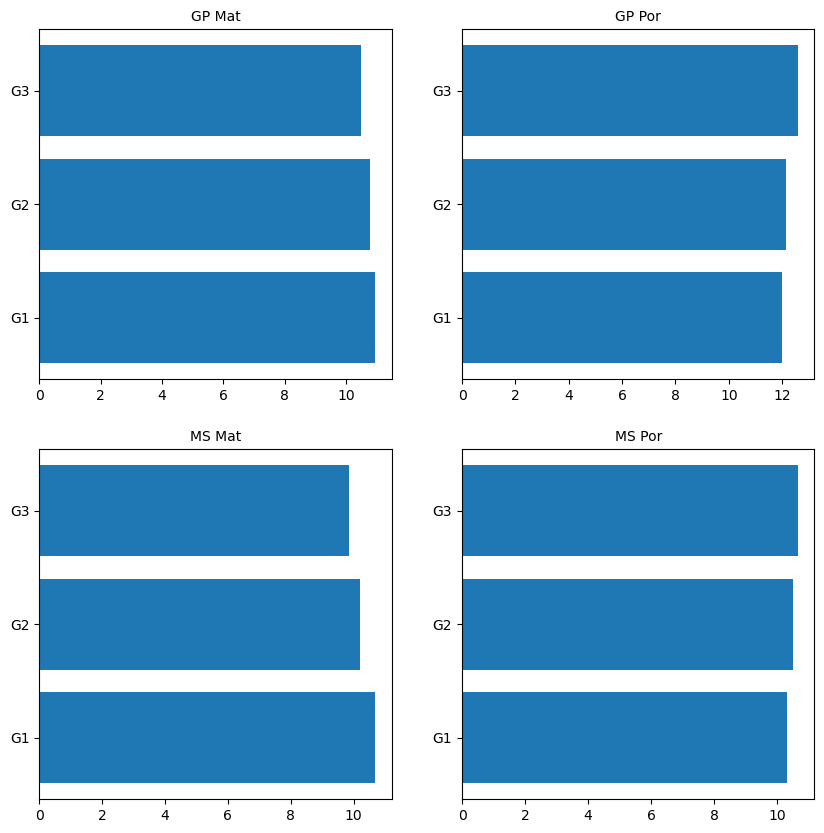

In [9]:
plt.figure(figsize=(10,10))

ax1= plt.subplot(221)
ax2= plt.subplot(222)
ax3= plt.subplot(223)
ax4= plt.subplot(224)

ax1.set_title("GP Mat",fontsize=10)
ax2.set_title("GP Por",fontsize=10)
ax3.set_title("MS Mat",fontsize=10)
ax4.set_title("MS Por",fontsize=10)

ax1.barh(avg_gp_mat.index,avg_gp_mat.values)
ax2.barh(avg_gp_por.index,avg_gp_por.values)
ax3.barh(avg_ms_mat.index,avg_ms_mat.values)
ax4.barh(avg_ms_por.index,avg_ms_por.values)
plt.show()

# 8
Halle el valor máximo de las ausencias y considere dicho valor como el total de clases del curso, de manera que pueda sacar un porcentaje de asistencia para cada estudiante

In [10]:
tc_gp_mat=gp_mat["absences"].max()
tc_gp_por=gp_por["absences"].max()
tc_ms_mat=ms_mat["absences"].max()
tc_ms_por=ms_por["absences"].max()
print(f"Total de ausencias para GP Mat: {tc_gp_mat}")
print(f"Total de ausencias para GP Por: {tc_gp_por}")
print(f"Total de ausencias para MS Mat: {tc_ms_mat}")
print(f"Total de ausencias para MS Por: {tc_ms_por}")

#OJO!!!!!
# como me pidieron "Halle el valor máximo de las ausencias y considere dicho valor
#como el total de clases del curso" de manera general, me estan diciendo que halle el maximo
#entre las 4 y considere ese numero como el total de clases para todos los cursos
total_clases=max([tc_gp_mat,tc_gp_por,tc_ms_mat,tc_ms_por])
print("el total de clases del curso es: ",total_clases )


Total de ausencias para GP Mat: 75
Total de ausencias para GP Por: 32
Total de ausencias para MS Mat: 17
Total de ausencias para MS Por: 12
el total de clases del curso es:  75


In [11]:
# porcentaje de asistencia para cada estudiante

def per_attendance(total_clases,absences):
    per= 100*(total_clases-absences)/total_clases
    return per

# 9
Cree una nueva columna llamada “extra”

In [12]:
import numpy as np
# asignar un valor nulo manualmente 
# =np.nan

gp_mat["extra"]=np.nan
ms_mat["extra"]=np.nan
gp_por["extra"]=np.nan
ms_por["extra"]=np.nan

gp_mat.head(5)

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6,NaN
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6,NaN
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10,NaN
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15,NaN
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10,NaN


# 10
Cree una nueva columna llamada “approved” en la cual determine si el estudiante aprueba o reprueba el curso (1 para aprueba, 0 para reprueba), considerando:

* Si el estudiante tiene un porcentaje de asistencia menor al 80% del curso reprueba
* Si el estudiante tiene un porcentaje de asistencia mayor al 80% del curso, pero la nota G3 es menor a 10 reprueba
* Si el estudiante tiene un porcentaje de asistencia mayor al 80% del curso, pero la nota G3 esta entre 10 y 15 aprueba y se asigna 1 a la columna extra
* Si el estudiante tiene un porcentaje de asistencia mayor al 80% del curso y la nota G3 es mayor a 15 aprueba y se asigna 0 a la columna extra

In [13]:
gp_mat["approved"]=np.nan
ms_mat["approved"]=np.nan
gp_por["approved"]=np.nan
ms_por["approved"]=np.nan
gp_mat.head(5)

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6,NaN,NaN
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6,NaN,NaN
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10,NaN,NaN
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15,NaN,NaN
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10,NaN,NaN


In [14]:
def approv(per,g3):
    if per < 80:
        approved = 0
        extra = 0
        
    else:
        if g3 < 10:
            approved = 0
            extra = 0
        
        elif 10 <= g3 <= 15:
            approved = 1
            extra = 1
        
        elif 15 < g3:
            approved = 1
            extra = 0
    return approved,extra
    
    
    

In [15]:
gp_mat.head(5)

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6,NaN,NaN
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6,NaN,NaN
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10,NaN,NaN
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15,NaN,NaN
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10,NaN,NaN


In [21]:
# reiniciamos los index para todos los df para no tener inconvenientes
#'''
gp_mat=gp_mat.reset_index()
gp_por=gp_por.reset_index()
ms_mat=ms_mat.reset_index()
ms_por=ms_por.reset_index()
#'''


In [24]:
#'''
del gp_mat["index"]
del gp_por["index"]
del ms_mat["index"]
del ms_por["index"]
#'''


In [25]:
ms_por.head(5)    


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11,NaN,NaN
1,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12,NaN,NaN
2,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10,NaN,NaN
3,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11,NaN,NaN
4,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17,NaN,NaN


In [27]:
#se llenan los datos fila a fila

def filler(df,total_clases):

    for index in range (len(df)):
        absences= df["absences"][index]
        g3=df["G3"][index]
        porcentaje=per_attendance(total_clases,absences)
        approved,extra=approv(porcentaje,g3)
        df["extra"][index]=int(approved)
        df["approved"][index]=int(extra)
    return df

gp_mat=filler(gp_mat,total_clases)
gp_por=filler(gp_por,total_clases)
ms_mat=filler(ms_mat,total_clases)
ms_por=filler(ms_por,total_clases)

C:\Users\joseb\AppData\Local\Temp\ipykernel_7612\1207866010.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["extra"][index]=int(approved)
C:\Users\joseb\AppData\Local\Temp\ipykernel_7612\1207866010.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["approved"][index]=int(extra)


In [28]:
gp_mat.head(10)

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6,0.0,0.0
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6,0.0,0.0
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10,1.0,1.0
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15,1.0,1.0
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10,1.0,1.0
5,GP,M,16,U,T,mother,1,2,0,yes,yes,5,10,15,15,15,1.0,1.0
6,GP,M,16,U,T,mother,1,2,0,no,yes,3,0,12,12,11,1.0,1.0
7,GP,F,17,U,A,mother,2,2,0,no,no,1,6,6,5,6,0.0,0.0
8,GP,M,15,U,A,mother,1,2,0,yes,yes,1,0,16,18,19,1.0,0.0
9,GP,M,15,U,T,mother,1,2,0,yes,yes,5,0,14,15,15,1.0,1.0


In [29]:
gp_por.head(10)

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,4,0,11,11,1.0,1.0
1,GP,F,17,U,T,father,1,2,0,no,yes,3,2,9,11,11,1.0,1.0
2,GP,F,15,U,T,mother,1,2,0,no,yes,3,6,12,13,12,1.0,1.0
3,GP,F,15,U,T,mother,1,3,0,no,yes,5,0,14,14,14,1.0,1.0
4,GP,F,16,U,T,father,1,2,0,no,no,5,0,11,13,13,1.0,1.0
5,GP,M,16,U,T,mother,1,2,0,no,yes,5,6,12,12,13,1.0,1.0
6,GP,M,16,U,T,mother,1,2,0,no,yes,3,0,13,12,13,1.0,1.0
7,GP,F,17,U,A,mother,2,2,0,no,no,1,2,10,13,13,1.0,1.0
8,GP,M,15,U,A,mother,1,2,0,no,yes,1,0,15,16,17,1.0,0.0
9,GP,M,15,U,T,mother,1,2,0,no,yes,5,0,12,12,13,1.0,1.0


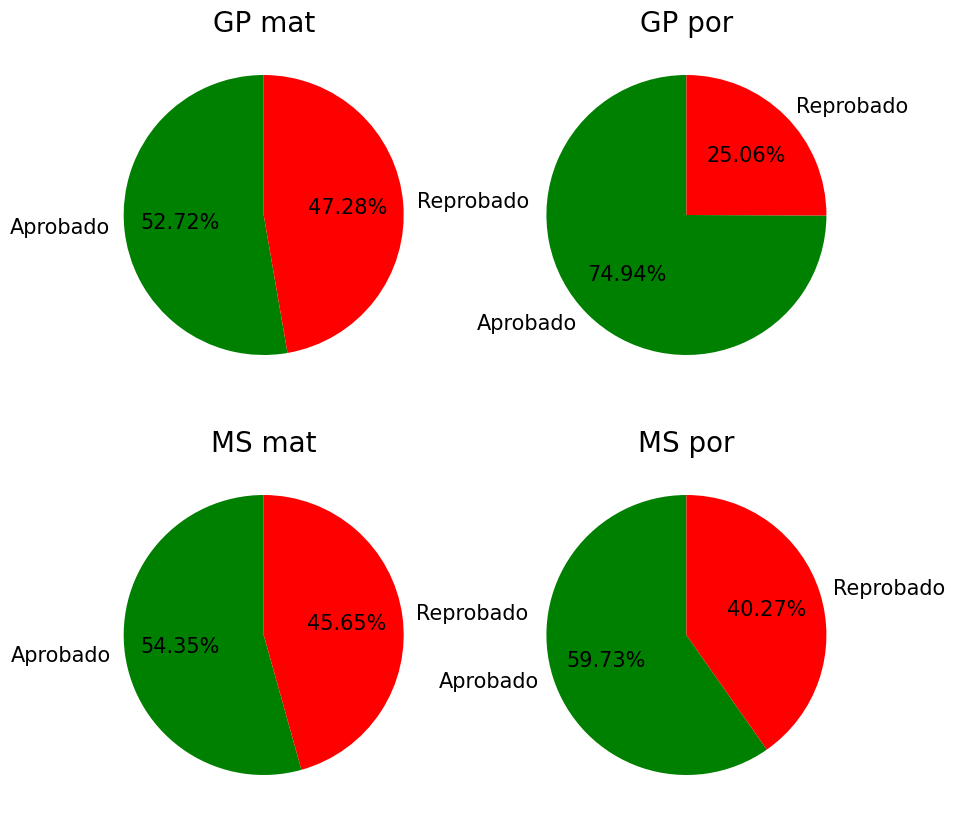

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.pie(gp_mat["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})
ax2.pie(gp_por["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})
ax3.pie(ms_mat["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})
ax4.pie(ms_por["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})

ax1.set_title("GP mat",fontsize=20)
ax2.set_title("GP por",fontsize=20)
ax3.set_title("MS mat",fontsize=20)
ax4.set_title("MS por",fontsize=20)

plt.show()

In [31]:
# trabajo extra, cuantos estudiantes deben presentar  trabajo extra para cada curso?

gp_mat["extra"].value_counts()

1.0    219
0.0    130
Name: extra, dtype: int64

# Resultado:

Generar un archivo en formato csv con nombre: “Resultado + Fecha en la que se ejecuta el script”, este archivo debe quedar en la carpeta donde se encuentren los datos originales y el archivo de Python
Entregar en un archivo PDF todas las gráficas solicitadas

In [32]:
# guarda cada dataframe como un archivo independiente

from datetime import datetime

date = datetime.now().strftime("%d-%m-%Y")
print(date)


#Guardando los dataframes en un archivo .csv
def guardarCSV(df, nombre, fecha):
    nombre = nombre + "_" + fecha + '.csv'
    print(nombre)
    df.to_csv(nombre, index = True)

guardarCSV(gp_mat, "Resultado_GP_Matematicas", date)
guardarCSV(gp_por, "Resultado_GP_Portugues", date)
guardarCSV(ms_mat, "Resultado_MS_Matematicas", date)
guardarCSV(ms_por, "Resultado_MS_Portugues", date)

13-03-2024
Resultado_GP_Matematicas_13-03-2024.csv
Resultado_GP_Portugues_13-03-2024.csv
Resultado_MS_Matematicas_13-03-2024.csv
Resultado_MS_Portugues_13-03-2024.csv


In [ ]:
# combina todos los dataframe y los guarda en un solo archivo
#Guardar csv
today = str(datetime.date.today())
name= "Resultado_" + today+".csv"

GP_mat.to_csv(name, header = True, index = False)
GP_por.to_csv(name, header = True, index = False, mode="a")
MS_mat.to_csv(name, header = True, index = False, mode="a")
MS_por.to_csv(name, header = True, index = False, mode="a")